In [1]:
%load_ext autoreload
%autoreload 2

import IPython
from pathlib import Path
import os
locals = IPython.extract_module_locals() # type: ignore
notebook_name = "/".join(locals[1]["__vsc_ipynb_file__"].split("/"))
os.chdir(Path(notebook_name).parent.parent)

# **1. Train MF (MFConv2) model with item embeddings pretrained during image classification process**


```
Context: In scenario where we had have an efficient GPU available, we'd choose to set the pretrained embeddings in paralell to the 
item embeddings, maybe even init weight of some Convnet (AlexNet) and train both item embedding and image processing branches simultaneously
by using some aggregation function on the top. Due to this constraint, we decided to check how the pretrained item embedding from 
the classification task behaves.
```

In [2]:
import json
import tempfile
import os


device = "cpu"
data = {
    "data": {
        "dataset": "hm",
        "prefix": "sep_2020"
    },
    "train": {
        "epochs": 20,
        "valid_size": 0.3,
        "batch_size": 256,
        "train_print_every": 100,
        "eval_batch_size": 1,
        "eval_user_batch_size": 1024,
        "eval_print_every": 1,
        "neg_sampl": 20,
        "lr": 1e-2
    },
    "model": {
        "model_type": "MFConv2",
        "model_config": {
            "emb_size": 16,
            "dropout": 0.2
        }
    }
}

temp_file = tempfile.NamedTemporaryFile(delete=False, mode='w', suffix='.json')
json.dump(data, temp_file)
temp_file.close()

config_path = temp_file.name

In [4]:
!python -m retail_recommender_system.scripts.train --config {config_path} --device {device}

2025-01-17 22:52:33,286 - retail_recommender_system.utils - INFO - Setting seed to 0
2025-01-17 22:52:33,324 - retail_recommender_system.trainer.loader - INFO - Model configuration:
{
  "model_type": "<class 'retail_recommender_system.models.mfconv.MFConv2'>",
  "model_config": {
    "emb_size": 16,
    "dropout": 0.2
  }
}
2025-01-17 22:52:33,325 - retail_recommender_system.trainer.loader - INFO - Train configuration:
{
  "valid_size": 0.3,
  "batch_size": 256,
  "train_print_every": 100,
  "eval_batch_size": 1,
  "eval_user_batch_size": 1024,
  "eval_print_every": 1,
  "neg_sampl": 20,
  "lr": 0.01,
  "epochs": 20
}
/Users/miloszhanczyk/Documents/uv/MOW_2/lab/retail_recommender_system/retail_recommender_system/models/mf.py:32: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting 

In [5]:
os.remove(temp_file.name)

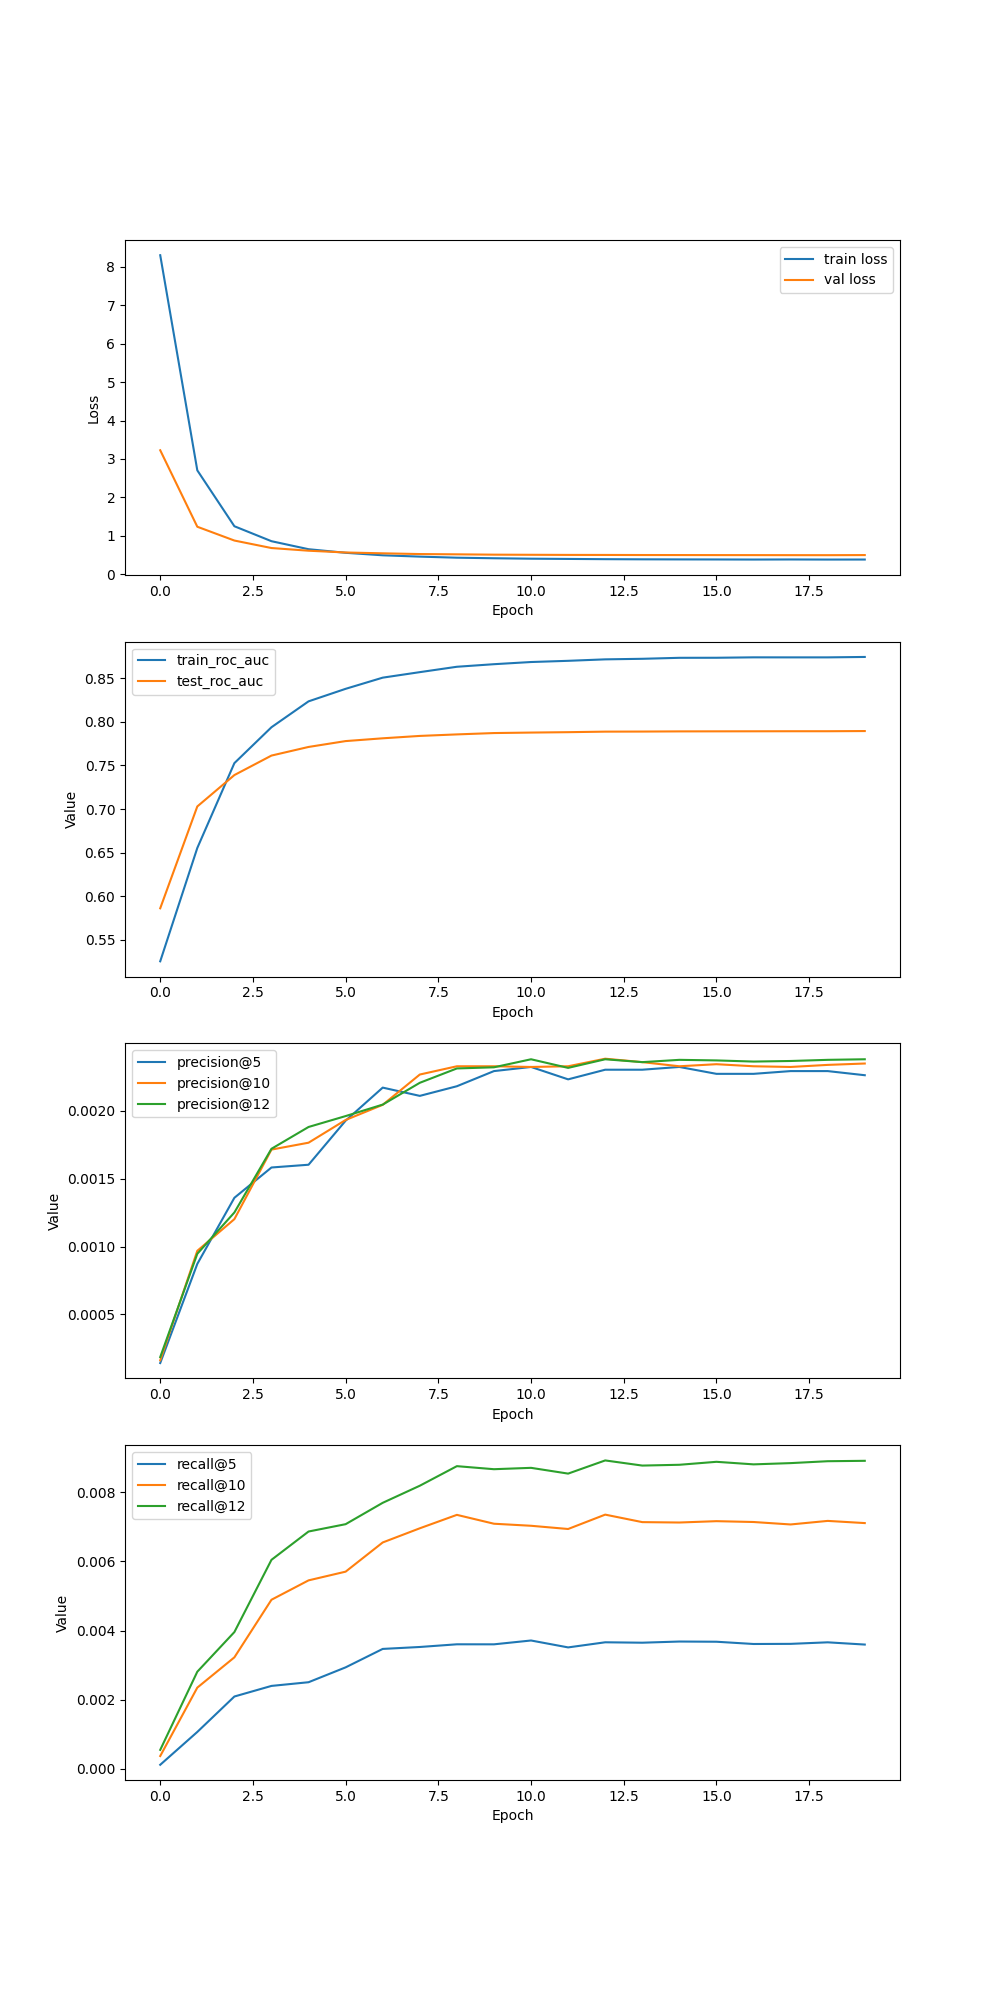

In [8]:
from IPython.display import Image

run_id = "2025-01-17_22-59-01"

with open(f".runs/MFConv2/{run_id}/history_log.json") as f:
    history = json.load(f)
    
image_path = f".runs/MFConv2/{run_id}/history_plot.png"
display(Image(filename=image_path))

In [9]:
print(json.dumps(history, indent=2))

{
  "train_loss": [
    8.305633799968975,
    2.701525694020039,
    1.2454182344769675,
    0.8559004521931863,
    0.6471870742118261,
    0.5535677515038393,
    0.48861708828553146,
    0.4542009042770373,
    0.4261206573107427,
    0.411697691022461,
    0.4002322319638792,
    0.39395934800622323,
    0.38755483326859175,
    0.3837506930635433,
    0.38151574424392276,
    0.380050392420949,
    0.3778348650681164,
    0.38000738979131343,
    0.3774673849372923,
    0.378125232377839
  ],
  "val_loss": [
    3.2248941080372324,
    1.2324535804303738,
    0.8730104615094634,
    0.6779905285524286,
    0.6080265062835377,
    0.5619915907562014,
    0.5401966530579352,
    0.5209025336584083,
    0.5138268348256589,
    0.5051505908428916,
    0.5018024104150388,
    0.4986510227320223,
    0.49781884188237396,
    0.4957863703782379,
    0.49504992731003894,
    0.4939910315948984,
    0.4934911758532166,
    0.4925014929102344,
    0.4918413766523595,
    0.4945733544854778

# **2. Summary (MF [MFConv2]):**
- The results were worse than in the case of classic (rand normal) weight initialization. 
- The experiment indicates the improvement is unlikely to happen, even for a longer training.
- Simultaneous Image processing and MF might bring more benefits